## Decision Tree Summary
Definition: A Decision Tree is a supervised learning algorithm used for classification and regression tasks. It models decisions based on feature values, creating a tree-like structure.
#### Structure:
•	Nodes: Represent features.

•	Branches: Decision rules.

•	Leaves: Outcomes (class labels or continuous values).
##### How It Works:
1.	Root Node: Starts with the entire dataset and selects the best feature to split the data.
2.	Splitting: Divides the data into subsets based on feature values.
3.	Recursive Splitting: Continues until a stopping criterion is met.
4.	Leaf Nodes: Contain the final prediction (most common class or average value).



In [1]:
import numpy as np
import seaborn as sns  # Seaborn for data visualization
import pandas as pd  # Pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Matplotlib for plotting
from sklearn import tree # tree for plotting DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier  # DecisionTreeClassifier for building the decision tree model
from sklearn.model_selection import train_test_split, GridSearchCV  # train_test_split for splitting the data into training and testing sets
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

In [2]:
# Load the Iris dataset
iris = sns.load_dataset('iris')
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [3]:
# Separate features and target
X = iris.drop('species', axis=1)  # Features: all columns except 'species'
y = iris['species']  # Target: 'species' column
X

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [4]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [7]:
# Train the model on the training data
decision_tree_model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [8]:
# Predict on the test data
y_pred = decision_tree_model.predict(X_test)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [9]:
# correlation
iris.corr(numeric_only=True)

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

In [10]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [11]:
decision_tree_model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

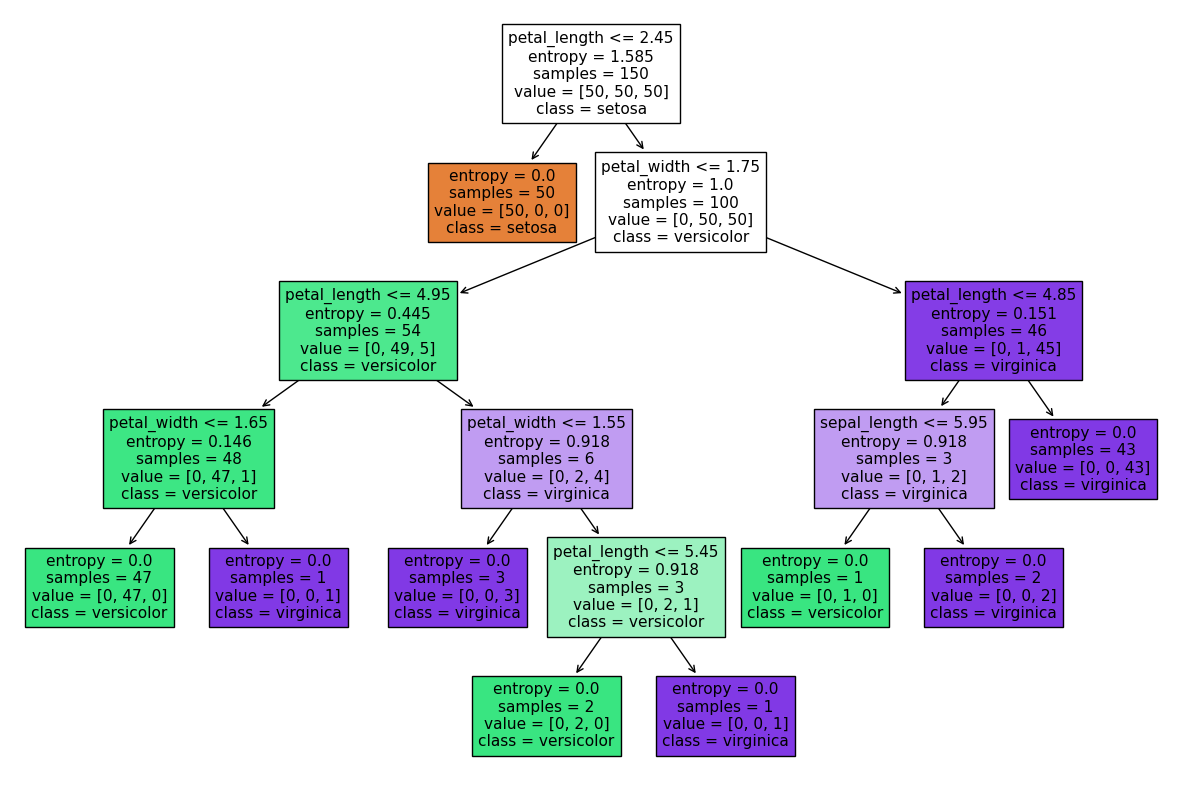

In [12]:
# Plot the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(decision_tree_model, filled=True, feature_names=X.columns, class_names=decision_tree_model.classes_)
plt.show()

In [13]:
# Create a cross-tabulation of the predicted and actual values
crosstab = pd.crosstab(y_pred, y_test)
crosstab

species     setosa  versicolor  virginica
row_0                                    
setosa          10           0          0
versicolor       0           9          0
virginica        0           0         11

In [14]:
# Evaluate the model 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


### Hyperparameter Tuning
We'll use GridSearchCV to find the best hyperparameters for our Decision Tree model.

In [15]:
# Defining the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_split': [5, 10, 15, 20]
}

# Performing grid search with cross-validation
grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

# Displaying the best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 5}
Best Score: 0.9333333333333333


In [16]:
# Initialize the Decision Tree Classifier with max_depth of tree is 3
decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

In [17]:
# Train the model on the training data
decision_tree_model.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

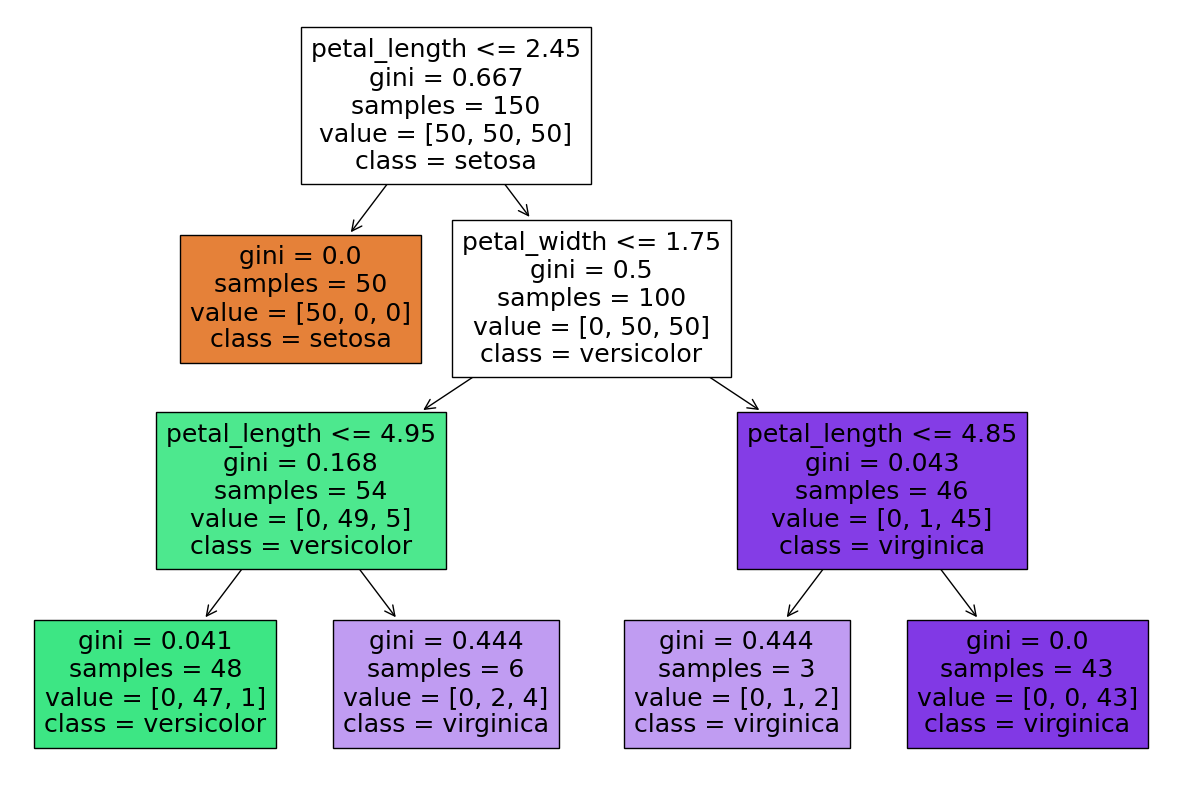

In [18]:
# Plot the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(decision_tree_model, filled=True, feature_names=X.columns, class_names=decision_tree_model.classes_)
plt.show()

In [19]:
titanic = sns.load_dataset('titanic')
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [20]:
titanic.drop(['deck', 'embark_town', 'alive', 'who', 'adult_male', 'alone'], axis='columns',inplace=True)
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class
0         0       3    male  22.0      1      0   7.2500        S  Third
1         1       1  female  38.0      1      0  71.2833        C  First
2         1       3  female  26.0      0      0   7.9250        S  Third
3         1       1  female  35.0      1      0  53.1000        S  First
4         0       3    male  35.0      0      0   8.0500        S  Third

In [21]:
titanic.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
dtype: int64

In [22]:
titanic['age'].fillna(titanic['age'].mean(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
titanic.head()

C:\Users\pavan\AppData\Local\Temp\ipykernel_19420\468976252.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].mean(), inplace=True)
C:\Users\pavan\AppData\Local\Temp\ipykernel_19420\468976252.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


survived  pclass     sex   age  sibsp  parch     fare embarked  class
0         0       3    male  22.0      1      0   7.2500        S  Third
1         1       1  female  38.0      1      0  71.2833        C  First
2         1       3  female  26.0      0      0   7.9250        S  Third
3         1       1  female  35.0      1      0  53.1000        S  First
4         0       3    male  35.0      0      0   8.0500        S  Third

In [23]:
titanic.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
dtype: int64

In [24]:
## encoding categorical features
categorical_features = ['sex', 'class', 'embarked']

label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    titanic[feature] = label_encoders[feature].fit_transform(titanic[feature])
titanic.head()

survived  pclass  sex   age  sibsp  parch     fare  embarked  class
0         0       3    1  22.0      1      0   7.2500         2      2
1         1       1    0  38.0      1      0  71.2833         0      0
2         1       3    0  26.0      0      0   7.9250         2      2
3         1       1    0  35.0      1      0  53.1000         2      0
4         0       3    1  35.0      0      0   8.0500         2      2

In [25]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class'],
      dtype='object')

In [26]:
X = titanic.drop(['survived'], axis='columns').values
y = titanic['survived'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [27]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.33075447217314485, 0.975, 'sex <= 0.5\ngini = 0.467\nsamples = 623\nvalue = [392, 231]\nclass = Not Survived'),
 Text(0.1413427561837456, 0.925, 'pclass <= 2.5\ngini = 0.396\nsamples = 213\nvalue = [58, 155]\nclass = Survived'),
 Text(0.03356890459363958, 0.875, 'age <= 2.5\ngini = 0.07\nsamples = 110\nvalue = [4, 106]\nclass = Survived'),
 Text(0.014134275618374558, 0.825, 'class <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Not Survived'),
 Text(0.007067137809187279, 0.775, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Not Survived'),
 Text(0.02120141342756184, 0.775, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Survived'),
 Text(0.053003533568904596, 0.825, 'fare <= 149.035\ngini = 0.054\nsamples = 108\nvalue = [3, 105]\nclass = Survived'),
 Text(0.0353356890459364, 0.775, 'age <= 49.5\ngini = 0.041\nsamples = 96\nvalue = [2, 94]\nclass = Survived'),
 Text(0.02120141342756184, 0.725, 'fare <= 22.0\ngini = 0.024\nsamples = 84\nvalue = [1, 83]\nclass = Surv

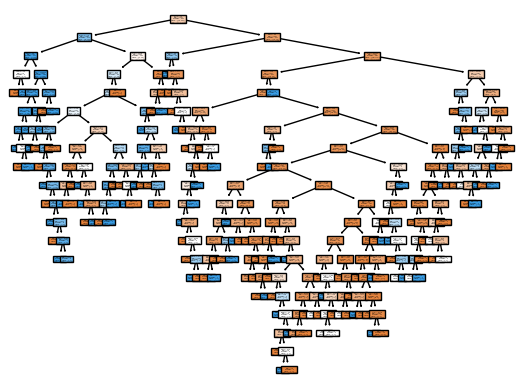

In [28]:
from sklearn.tree import plot_tree

plot_tree(dt, feature_names=titanic.drop(['survived'], axis='columns').columns, class_names=['Not Survived', 'Survived'], filled=True)

## Evaluating the Model
We'll evaluate the model using accuracy, confusion matrix, and classification report.

In [29]:
# Making predictions on the test set
y_pred = dt.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Accuracy: 0.7388059701492538

Confusion Matrix:
[[124  33]
 [ 37  74]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       157
           1       0.69      0.67      0.68       111

    accuracy                           0.74       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.74      0.74      0.74       268



## Hyperparameter Tuning
We'll use GridSearchCV to find the best hyperparameters for our Decision Tree model.

In [30]:
# Defining the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6,7 ,8,9, 10, 12,15,18],
    'min_samples_split': [2, 5, 10, 20]
}

# Performing grid search with cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

# Displaying the best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 2}
Best Score: 0.8154451612903226


In [31]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)

## Visualizing the Decision Tree
We'll visualize the decision tree to understand how it makes decisions.

In [32]:
# Visualizing the decision tree
best_tree = grid_search.best_estimator_
plt.figure(figsize=(200, 100),dpi=100)
plot_tree(best_tree, feature_names=titanic.drop(['survived'], axis=1).columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.show()

## Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
# Making predictions on the test set
y_pred = rf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Accuracy: 0.7947761194029851

Confusion Matrix:
[[135  22]
 [ 33  78]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       157
           1       0.78      0.70      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.79      0.79      0.79       268



In [35]:
# Splitting the dataset into training and testing sets
X = titanic.drop(['survived'], axis=1).values
y = titanic['survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
X_dash,y_dash, = X[100:800], y[100:800]
X_dash_2,y_dash_2 = X[0:700],y[0:700]

In [37]:
dt1,dt2 = DecisionTreeClassifier(),DecisionTreeClassifier()

# Defining the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6,7 ,8,9, 10, 12,15,18],
    'min_samples_split': [2, 5, 10, 20]
}

# Performing grid search with cross-validation
grid_search1 = GridSearchCV(estimator=dt1, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)
grid_search1.fit(X_dash, y_dash)

# Displaying the best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')
# Defining the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6,7 ,8,9, 10, 12,15,18],
    'min_samples_split': [2, 5, 10, 20]
}

# Performing grid search with cross-validation
grid_search2 = GridSearchCV(estimator=dt2, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)
grid_search2.fit(X_dash_2, y_dash_2)

# Displaying the best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 2}
Best Score: 0.8154451612903226
Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 2}
Best Score: 0.8154451612903226


In [38]:
# Making predictions on the test set
y_pred = grid_search1.best_estimator_.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Accuracy: 0.8246268656716418

Confusion Matrix:
[[145  12]
 [ 35  76]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       157
           1       0.86      0.68      0.76       111

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268



In [39]:
# Making predictions on the test set
y_pred = grid_search2.best_estimator_.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Accuracy: 0.835820895522388

Confusion Matrix:
[[150   7]
 [ 37  74]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       157
           1       0.91      0.67      0.77       111

    accuracy                           0.84       268
   macro avg       0.86      0.81      0.82       268
weighted avg       0.85      0.84      0.83       268



In [40]:
dt1.fit(X_dash, y_dash)

DecisionTreeClassifier()

In [41]:
dt1.predict(X_test[0].reshape(1, -1))[0]

1

[Text(0.3493068707912458, 0.9722222222222222, 'sex <= 0.5\ngini = 0.472\nsamples = 700\nvalue = [433, 267]\nclass = Not Survived'),
 Text(0.16666666666666666, 0.9166666666666666, 'pclass <= 2.5\ngini = 0.387\nsamples = 244\nvalue = [64, 180]\nclass = Survived'),
 Text(0.04040404040404041, 0.8611111111111112, 'age <= 3.0\ngini = 0.098\nsamples = 135\nvalue = [7, 128]\nclass = Survived'),
 Text(0.013468013468013467, 0.8055555555555556, 'class <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Not Survived'),
 Text(0.006734006734006734, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Not Survived'),
 Text(0.020202020202020204, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Survived'),
 Text(0.06734006734006734, 0.8055555555555556, 'fare <= 13.25\ngini = 0.086\nsamples = 133\nvalue = [6, 127]\nclass = Survived'),
 Text(0.03367003367003367, 0.75, 'age <= 53.5\ngini = 0.236\nsamples = 22\nvalue = [3, 19]\nclass = Survived'),
 Text(0.026936026936026935, 0.69444444444444

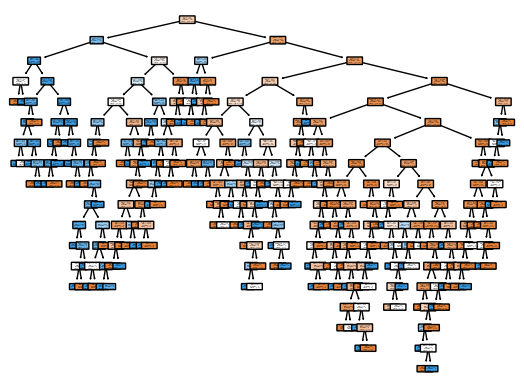

In [42]:
plot_tree(dt1, feature_names=titanic.drop(['survived'], axis=1).columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)